In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt, log
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [29]:
import pandas as pd
from category_encoders import TargetEncoder

## Chargement des données

In [30]:
data_train1=pd.read_csv('./Datatrain/TRAIN_requete2_features.csv')
data_train1=data_train1.drop(['Unnamed: 0'],axis=1)

In [31]:
data_train2=pd.read_csv('./Datatrain/test_requete_features.csv')
data_train2=data_train2.drop(['Unnamed: 0'],axis=1)

In [32]:
data_train2['index_request']=0

In [33]:
data=pd.concat([data_train1,data_train2])

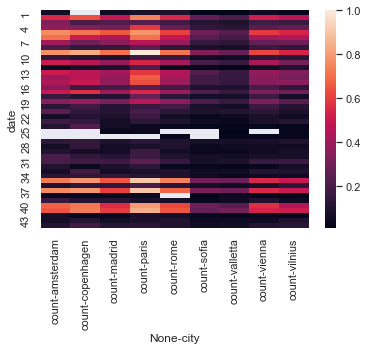

In [34]:
sns.set_theme(style="darkgrid")

data["count"] = 1

col1,col2 = 'date', 'city'
data = data[[col1,col2,"count"]]

data = data.groupby([col1,col2]).sum()
data = data.reset_index()
data['count'] = data['count']/max(data['count']) 
data = data.pivot(index= col1, columns=col2) #, values='count')

sns.heatmap(data)
plt.show()

In [35]:
data_train1=pd.read_csv('./Datatrain/TRAIN_requete2_features.csv')
data_train1=data_train1.drop(['Unnamed: 0'],axis=1)

In [36]:
data_train2=pd.read_csv('./Datatrain/test_requete_features.csv')
data_train2=data_train2.drop(['Unnamed: 0'],axis=1)

In [52]:
data_train1

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0
1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0
2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0
3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0
4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60341,666,79,16,vienna,19,slovakian,0,334155,NaN,Independant,Independant,1,0,0
60342,839,166,49,vienna,19,slovakian,0,334155,NaN,Yin Yang,Royal Lotus,0,0,0
60343,810,100,20,vienna,19,slovakian,0,334155,NaN,Boss Western,Boss Western,1,0,0
60344,236,77,9,vienna,19,slovakian,0,334155,NaN,Yin Yang,8 Premium,0,0,0


In [37]:
data_train2['index_request']=0

In [38]:
data=pd.concat([data_train1,data_train2])

# Vérification du contenu
data.head()
print(len(data))

351753


In [39]:
data_test= pd.read_csv('test_set.csv')
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


## Etude des jeux de données test et train

Text(0.5, 1.0, 'Distribution of date data_test')

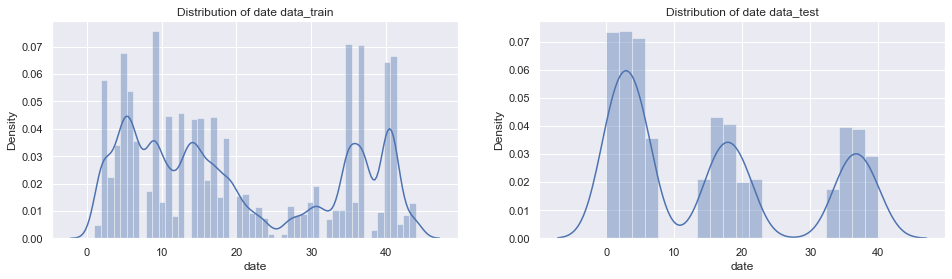

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data['date'], ax=ax1)
ax1.set_title('Distribution of date data_train')


sns.distplot(data_test['date'], ax=ax2)
ax2.set_title('Distribution of date data_test')

Text(0.5, 1.0, 'Distribution of city data_test')

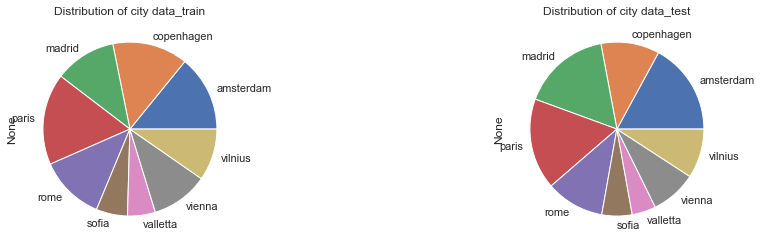

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
data.groupby('city').size().plot(kind='pie',ax=ax1)
ax1.set_title('Distribution of city data_train')


data_test.groupby('city').size().plot(kind='pie',ax=ax2)
ax2.set_title('Distribution of city data_test')

Text(0.5, 1.0, 'Distribution of language data_test')

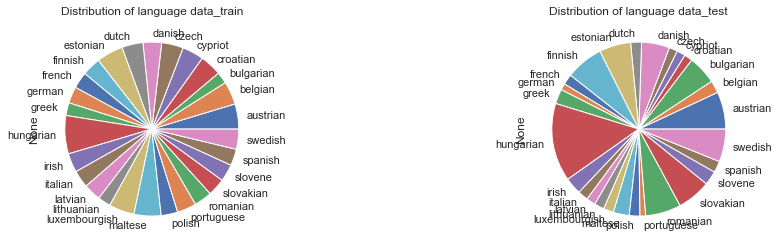

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
data.groupby('language').size().plot(kind='pie',ax=ax1)
ax1.set_title('Distribution of language data_train')


data_test.groupby('language').size().plot(kind='pie',ax=ax2)
ax2.set_title('Distribution of language data_test')

Text(0.5, 1.0, 'Distribution of mobile data_test')

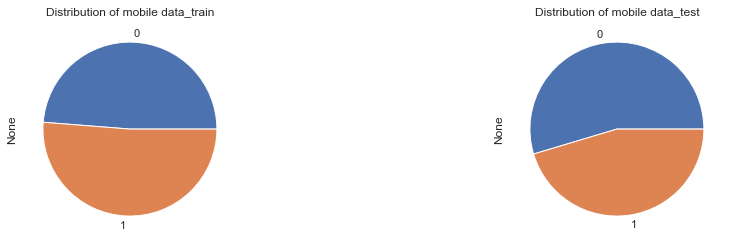

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
data.groupby('mobile').size().plot(kind='pie',ax=ax1)
ax1.set_title('Distribution of mobile data_train')


data_test.groupby('mobile').size().plot(kind='pie',ax=ax2)
ax2.set_title('Distribution of mobile data_test')

In [44]:
len(data)

351753

In [45]:
## Peut être enlever les variables comme hotel_id, avatar_id ? 

data.describe()

,hotel_id,price,stock,date,mobile,avatar_id,index_request,parking,pool,children_policy
count,351753.000000,351753.000000,351753.000000,351753.000000,351753.000000,351753.000000,291548.000000,351753.000000,351753.000000,351753.000000
mean,499.046376,158.407397,41.366595,20.026268,0.512502,105926.107317,0.000978,0.437708,0.169846,0.064352
std,288.278943,81.155013,54.107314,13.590503,0.499844,66738.370734,0.047893,0.496105,0.375498,0.299666
min,0.000000,38.000000,0.000000,1.000000,0.000000,6217.000000,0.000000,0.000000,0.000000,0.000000
25%,248.000000,97.000000,4.000000,8.000000,0.000000,34429.000000,0.000000,0.000000,0.000000,0.000000
50%,502.000000,141.000000,16.000000,16.000000,1.000000,95250.000000,0.000000,0.000000,0.000000,0.000000
75%,748.000000,195.000000,64.000000,35.000000,1.000000,146462.000000,0.000000,1.000000,0.000000,0.000000
max,998.000000,547.000000,284.000000,44.000000,1.000000,334155.000000,3.000000,1.000000,1.000000,2.000000


## Analyse descriptive

### Distribution de la variable à prédire 'price'

Text(0.5, 1.0, 'Distribution of price after log transform')

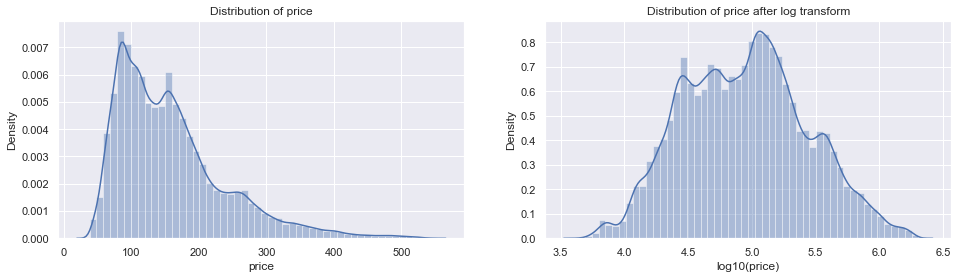

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["price"], ax=ax1)
ax1.set_title('Distribution of price')

data["log_price"]=data["price"].map(lambda x : log(x))
sns.distplot(data["log_price"].rename('log10(price)'), ax=ax2)
ax2.set_title('Distribution of price after log transform')

### Distribution des variables quantitatives

Text(0.5, 1.0, 'Distribution of date')

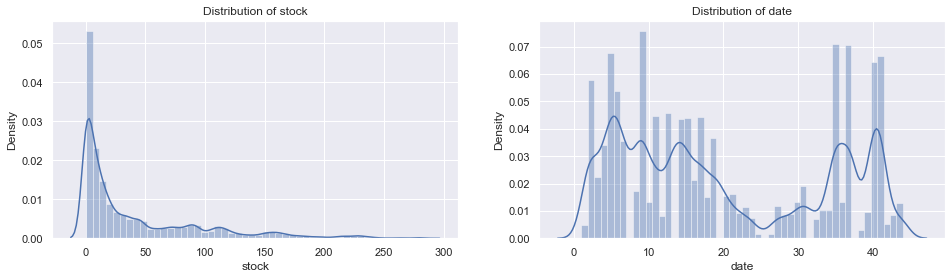

In [47]:
numerical=['stock','date']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["stock"], ax=ax1)
ax1.set_title('Distribution of stock')


## Date peut être pas pertinent ? 
sns.distplot(data["date"], ax=ax2)
ax2.set_title('Distribution of date')

In [48]:
data[numerical].corr()

,stock,date
stock,1.000000,0.800673
date,0.800673,1.000000


### Distribution variables qualitatives

In [24]:
list_parking=data["parking"].tolist()
list_parking2=[list_parking.count(0),list_parking.count(1)]

list_pool=data["pool"].tolist()
list_pool2=[list_pool.count(0),list_pool.count(1)]

list_children=data["children_policy"].tolist()
list_children2=[list_children.count(0),list_children.count(1),list_children.count(2)]

list_mobile=data["mobile"].tolist()
list_mobile2=[list_mobile.count(0),list_mobile.count(1)]


Text(0.5, 1.0, 'mobile')

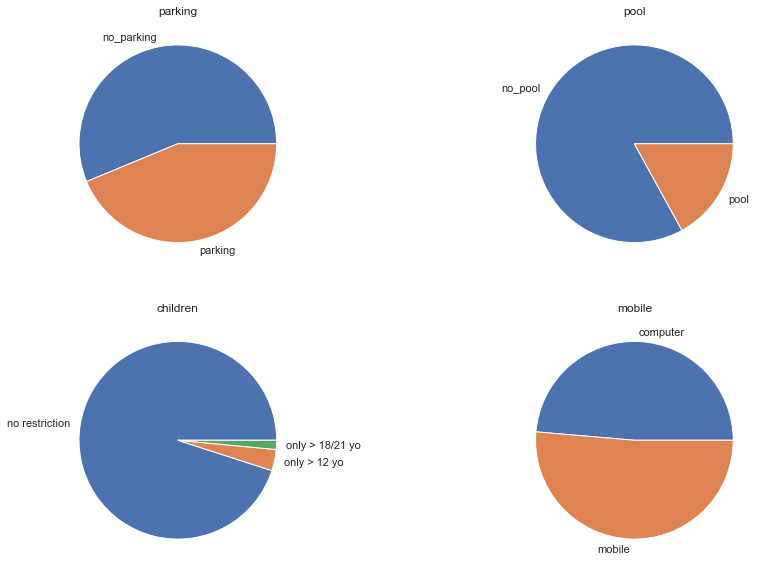

In [25]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
axis[0,0].pie(list_parking2, labels = ['no_parking','parking'])
axis[0,0].set_title('parking')

axis[0,1].pie(list_pool2, labels = ['no_pool','pool'])
axis[0,1].set_title('pool')

axis[1,0].pie(list_children2, labels = ['no restriction','only > 12 yo','only > 18/21 yo' ])
axis[1,0].set_title('children')

axis[1,1].pie(list_mobile2, labels = ['computer','mobile'])
axis[1,1].set_title('mobile')

### Distribution du prix par rapport aux variables qualitatives

In [26]:
## Comprend pas pourquoi ça ne fonctionne pas de tous les afficher d'un coup ? 


# fig, axis = plt.subplots(2,2,figsize=(20,15))
# sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)
# axis[0,0].set_title('parking')

# sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)
# axis[0,1].set_title('pool')

# sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)
# axis[1,0].set_title('children')

# sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)
# axis[1,1].set_title('mobile')

[Text(0.5, 0, '')]

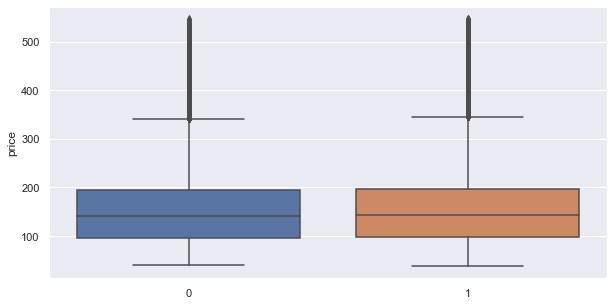

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

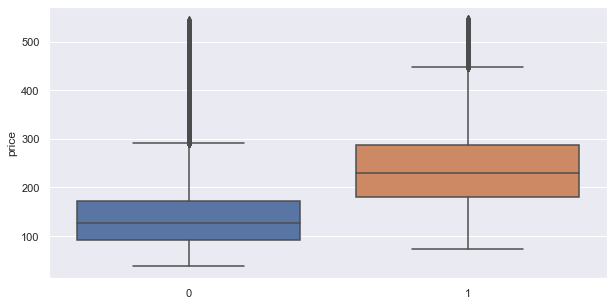

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

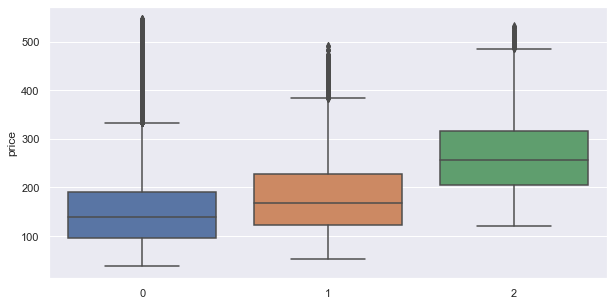

In [29]:
# Est-ce que l’hôtel a des restrictions concernant les enfants. 2 si l’hôtel interdit les enfants de moins de 18 ou 21 ans, 
# 1 si l’hôtel interdit les enfants de moins de 12 ans, 0 s’il autorise les enfants sans restrictions.

sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

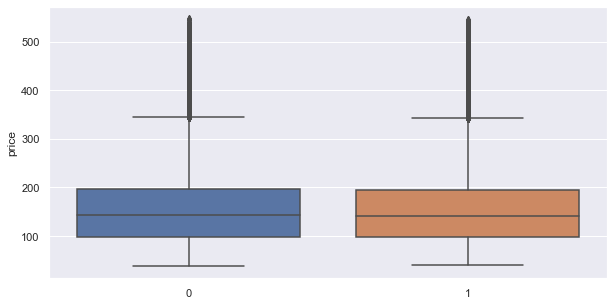

In [30]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)

## Modele

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV, LassoLarsCV
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [16]:
data=data.drop(['log_price','avatar_id'],axis=1)

KeyError: "['log_price'] not found in axis"

In [49]:
data

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0,5.003946
1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0,5.068904
2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0,4.219508
3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0,4.844187
4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0,4.867534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291402,620,170,12,vilnius,15,swedish,1,146515,0.0,Chillton Worldwide,Quadrupletree,0,1,0,5.135798
291403,605,182,15,vilnius,15,swedish,1,146515,0.0,Yin Yang,Royal Lotus,1,0,0,5.204007
291404,516,264,23,vilnius,15,swedish,1,146515,0.0,Morriott International,Corlton,1,0,2,5.575949
291405,490,144,13,vilnius,15,swedish,1,146515,0.0,Yin Yang,Ardisson,1,0,0,4.969813


In [50]:
data_train

NameError: name 'data_train' is not defined

In [18]:
# cat_to_encod = ['city', 'language', 'group', 'brand']

# enc = OneHotEncoder(categories='auto')
# for feature in cat_to_encod: 
#     data[feature]=pd.DataFrame(enc.fit_transform(data[[feature]]).toarray())

In [19]:
encoder = TargetEncoder()
data['city'] = encoder.fit_transform(data['city'], data['price'])
data['language'] = encoder.fit_transform(data['language'], data['price'])
data['group'] = encoder.fit_transform(data['group'], data['price'])
data['brand'] = encoder.fit_transform(data['brand'], data['price'])

In [20]:
## equivalent méthode OneHotEncoding, a potentiellement modifier
## pour ne pas avoir de string 


# data=pd.get_dummies(data, columns=['city', 'language', 'group', 'brand'])

In [21]:
data

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
0,639,149,110,145.370922,35,157.175881,1,155054,1.0,149.996324,201.787040,0,1,0
1,376,159,115,145.370922,35,157.175881,1,155054,1.0,189.189101,198.757774,0,0,0
2,985,68,70,145.370922,35,157.175881,1,155054,1.0,96.697949,96.697949,1,0,0
3,377,127,84,145.370922,35,157.175881,1,155054,1.0,134.996295,148.666200,1,0,0
4,200,130,80,145.370922,35,157.175881,1,155054,1.0,134.996295,148.666200,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291402,620,170,12,111.681429,15,164.338558,1,146515,0.0,219.628452,206.371275,0,1,0
291403,605,182,15,111.681429,15,164.338558,1,146515,0.0,149.996324,201.787040,1,0,0
291404,516,264,23,111.681429,15,164.338558,1,146515,0.0,224.441318,286.095274,1,0,2
291405,490,144,13,111.681429,15,164.338558,1,146515,0.0,149.996324,158.111390,1,0,0


In [22]:
price=data['price']
X_train, X_test, Y_train, Y_test = train_test_split(data,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'],axis=1)
X_test=X_test.drop(['price'],axis=1)

In [23]:
X_train.head()

,hotel_id,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
27682,249,81,197.148349,33,159.691804,1,158560,NaN,96.697949,96.697949,0,0,0
211696,352,18,167.151067,3,160.543095,0,131645,0.0,96.697949,96.697949,1,0,0
237108,283,14,167.151067,17,160.253092,1,38438,0.0,96.697949,96.697949,1,0,0
273298,566,8,149.541524,6,152.538618,0,146465,0.0,189.189101,198.757774,0,0,0
134063,485,45,149.541524,41,161.136857,0,92221,0.0,96.697949,96.697949,0,0,0


In [ ]:
# scaler = StandardScaler()  
# scaler.fit(X_train)  
# Xr_train = scaler.transform(X_train)  
# # Meme transformation sur le test
# Xr_test = scaler.transform(X_test)

## Decision tree

In [ ]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
regtree= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
regtreeOpt=regtree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regtreeOpt.best_score_,regtreeOpt.best_params_))

Ypred_regtree = regtreeOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regtree,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regtree))

In [ ]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regrf,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regrf))


## Random Forest

In [24]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(X_test)


print("MSE : ",mean_squared_error(Ypred_regrf,Y_test))
print("RMSE : ", sqrt(mean_squared_error(Ypred_regrf,Y_test)))
print("R2 : ",r2_score(Y_test,Ypred_regrf))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\elisa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\elisa\AppData\Local\Temp\ipykernel_11172\3286668484.py", line 3, in <module>
    regrfOpt=regrf.fit(X_train, Y_train)
  File "C:\Users\elisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\elisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\elisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 851, in evaluate_candidates
    enumerate(candidate_params), enumerate(cv.split(X, y, groups))
  File "C:\Users\elisa\Anaconda3\lib\site-packages\joblib\parallel.py", line 1061, in __call__
    self.retrieve()
  File "C:\Users\elisa\Anaconda3\lib\site-packa

TypeError: object of type 'NoneType' has no len()

## Gradient Boosting

In [ ]:
param=[{"max_depth":[1,2,3], "learning_rate":[0.1,0.5,1.0]}]
reggradboost = GridSearchCV(GradientBoostingRegressor(n_estimators=100), param, cv=10,n_jobs=-1)

reggradboost_Opt=reggradboost.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (reggradboost_Opt.best_score_,reggradboost_Opt.best_params_))

Ypred_gbreg = reggradboost_Opt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_gbreg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_gbreg))


In [ ]:
param=[{"max_depth":[3,5,10,20], "learning_rate":[1.0,1.2,1.5,2.0,5.0]}]
reggradboost = GridSearchCV(GradientBoostingRegressor(n_estimators=100), param, cv=10,n_jobs=-1)

reggradboost_Opt=reggradboost.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (reggradboost_Opt.best_score_,reggradboost_Opt.best_params_))

Ypred_gbreg = reggradboost_Opt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_gbreg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_gbreg))

## Regression Linéaire

#### Sans pénalisation

In [ ]:
reg_lin = linear_model.LinearRegression()

reglin = reg_lin.fit(X_train,Y_train)
Ypred_reglin = reglin.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_reglin,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_reglin))

#### Avec pénalisation Lasso

In [ ]:
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Ypred_regLasso=regLassOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regLasso,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regLasso))

In [ ]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
regCoef=regLasso.fit(X_train,Y_train).coef_
print(regCoef)

In [ ]:
coef = pd.Series(regCoef, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

In [ ]:
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(X_train,Y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

## SVM

#### SVM Noyau linéaire

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4]}]
regsvm_l = GridSearchCV(SVR(kernel="linear"), param, cv=5, n_jobs=-1)  # try kernel="rbf" instead

regsvmOpt_l=regsvm_l.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_l.best_score_,regsvmOpt_l.best_params_))

Ypred_regsvml = regsvmOpt_l.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvml,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvml))



#### SVM Noyau gaussien

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4],"gamma":[0.01,0.02,0.05,0.07,0.1,0.15,0.2]}]
regsvm_g = GridSearchCV(SVR(kernel="rbf"), param, cv=5, n_jobs=-1)  

regsvmOpt_g=regsvm_g.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_g.best_score_,regsvmOpt_g.best_params_))

Ypred_regsvmg = regsvmOpt_g.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvmg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvmg))


#### SVM Noyau polynomial

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4],"gamma":[0.01,0.02,0.05,0.07,0.1,0.15,0.2]}]
regsvm_p = GridSearchCV(SVR(kernel="rbf"), param, cv=5, n_jobs=-1)  

regsvmOpt_p=regsvm_p.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_p.best_score_,regsvmOpt_p.best_params_))

Ypred_regsvmp = regsvmOpt_p.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvmp,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvmp))

## Test Interpretabilité

In [24]:
feature_names = X_train.columns

In [25]:
lr = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)


rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(max_depth=10),
)


mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)

lr.fit(X_train, Y_train)
print(f"Linear regression score: {lr.score(X_test, Y_test):.2f}")
rf.fit(X_train, Y_train)
print(f"Random forest score: {rf.score(X_test, Y_test):.2f}")
mlp.fit(X_train, Y_train)
print(f"MLP score: {mlp.score(X_test, Y_test):.2f}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
for c, feature_name in zip(lr[1].coef_, feature_names):
    print(feature_name, c)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [34]:
# pip install eli5 

  Using cached https://files.pythonhosted.org/packages/bc/c3/f068337a370801f372f2f8f6bad74a5c140f6fda3d9de154052708dd3c65/Jinja2-3.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl
  Found existing installation: Jinja2 2.10.3
    Uninstalling Jinja2-2.10.3:
      Successfully uninstalled Jinja2-2.10.3
Note: you may need to restart the kernel to use updated packages.


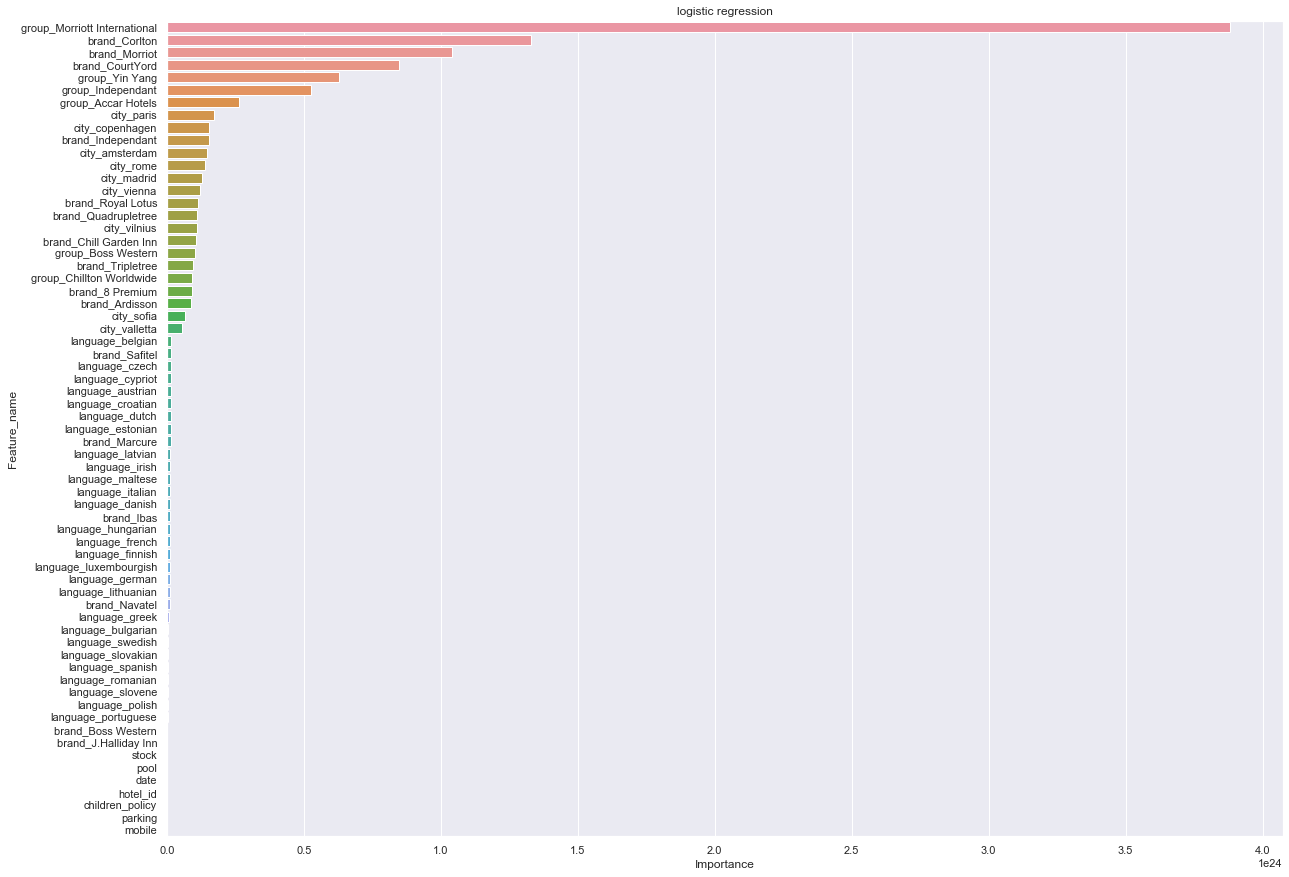

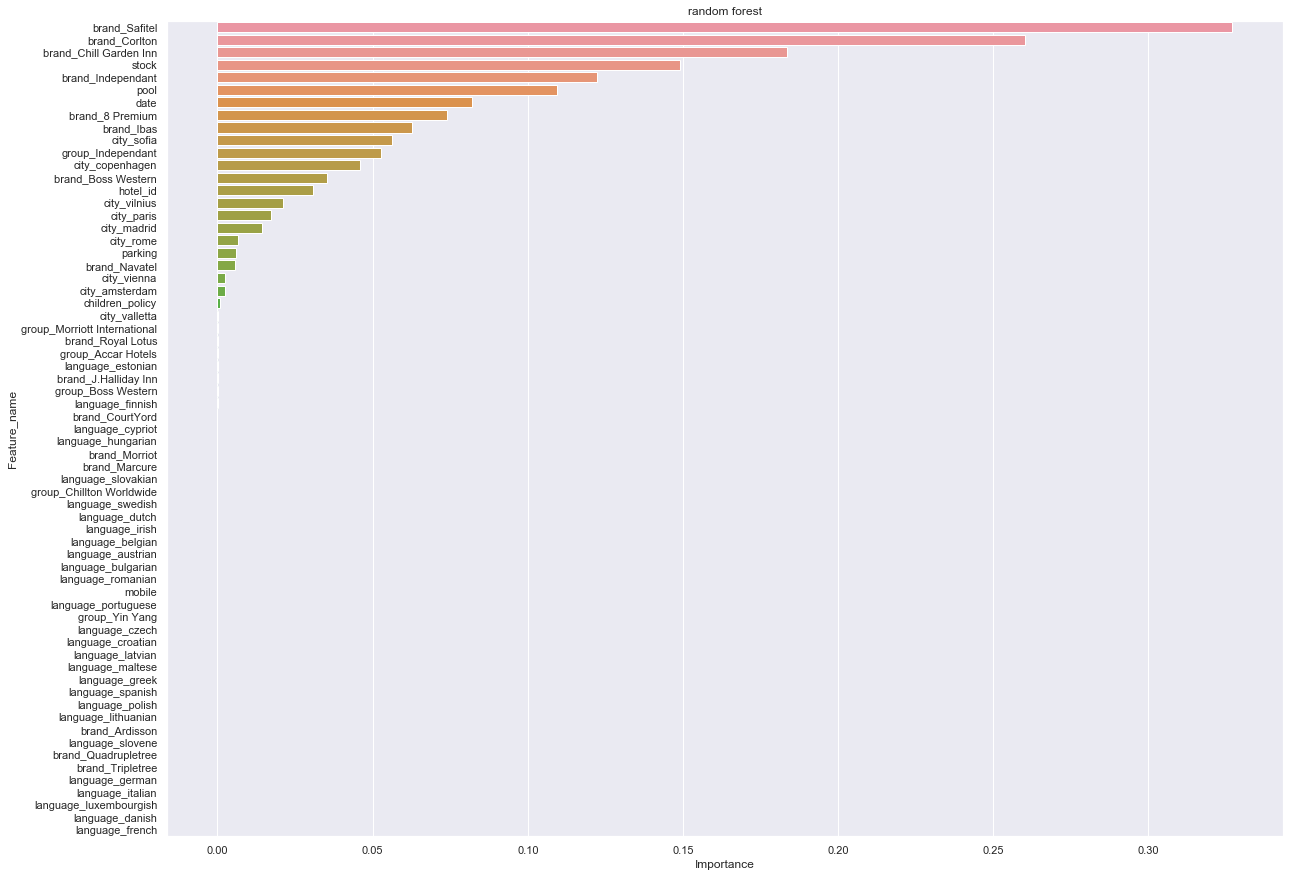

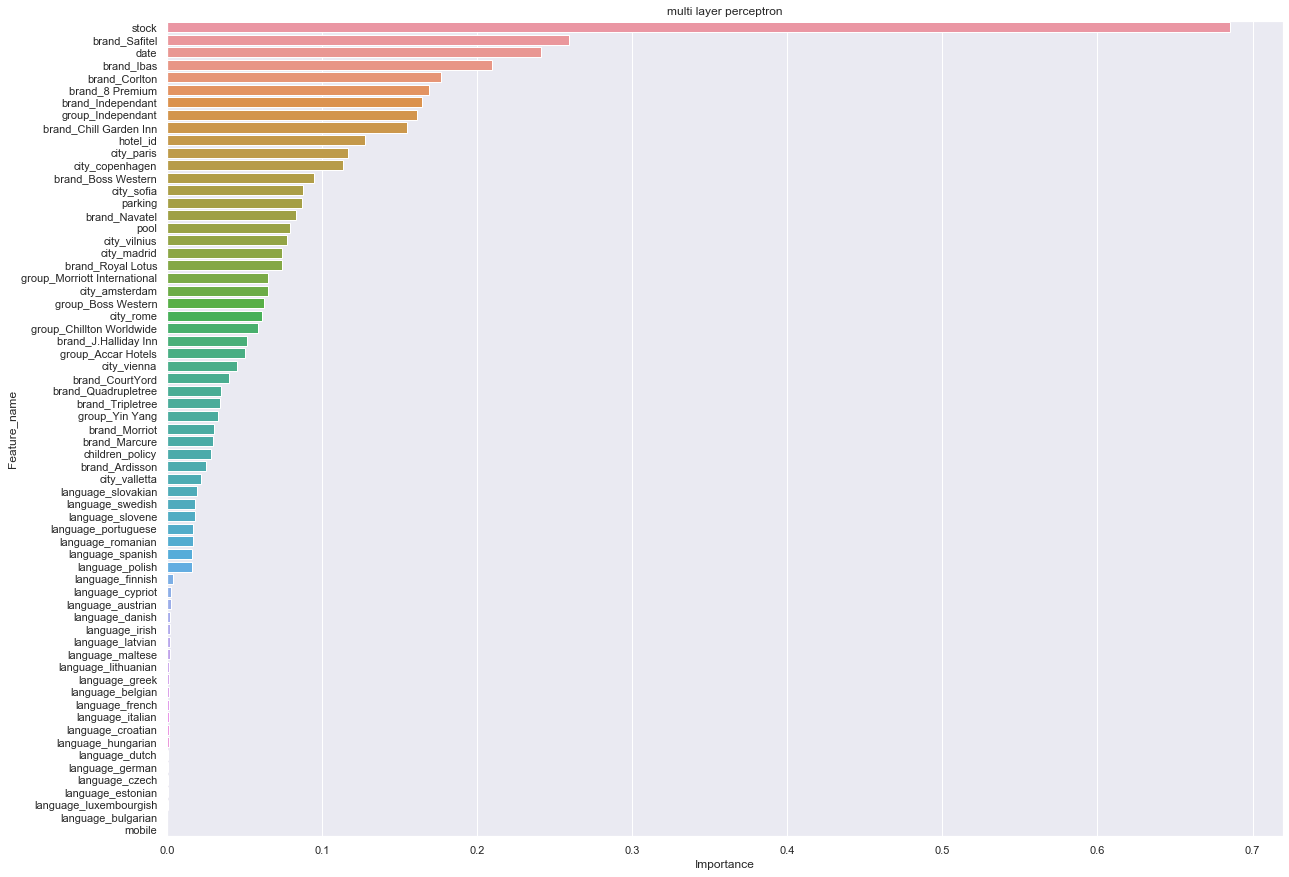

In [112]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
import seaborn as sns

features_importance_dict = {}
for model, name in zip([lr, rf, mlp], ['logistic regression', 'random forest', 'multi layer perceptron']):
  plt.figure(figsize=(20,15))
  permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, Y_test)
  features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
  features_importance = pd.DataFrame(features_importance) 
  features_importance = features_importance.sort_values(['Importance'], ascending=False) 
  features_importance_dict[name] = features_importance
  ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)
  plt.title(name)

In [113]:
pip install pdpbox

  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758245 sha256=2c29b0996d060015906f44534bd4366552ea2ffc63b938cd650534bafcb44618
  Stored in directory: C:\Users\elisa\AppData\Local\pip\Cache\wheels\c8\13\11\ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
  Created wheel for sklearn: filename=sklearn-0.0.post1-cp37-none-any.whl size=2348 sha256=e3cd15b5ce31637e90e4ef4679db4575f0aff75ea08eba2e7f3da03fe16717d6
  Stored in directory: C:\Users\elisa\AppData\Local\pip\Cache\wheels\04\0d\bd\ece5f15a5aea68fcb85632ecd7ad7f5ecf78d28152e8e1003e
Successfully built pdpbox sklearn
Note: you may need to restart the kernel to use updated packages.


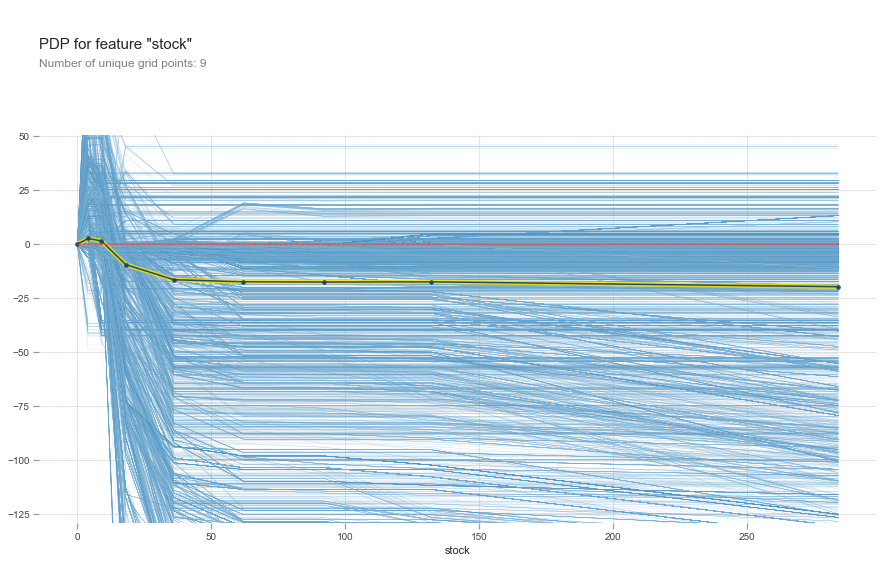

In [116]:
from pdpbox import pdp, get_dataset, info_plots

pdp_feat = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=feature_names, feature='stock')

pdp.pdp_plot(pdp_feat, 'stock', plot_lines=True, frac_to_plot=0.5)
plt.show()

In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs() #needed to plot results directly on the notebook

idx = 1 # index of the instance we want to explain

explainer = shap.KernelExplainer(rf.predict, X_test.iloc[0:2000,:])
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0,:])

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:5,:]) #To speed up we just compute the shap values for 5 exemples
shap.summary_plot(shap_values, X_test.iloc[0:5,:])

# Log price with Random forest

In [152]:
data_train1=pd.read_csv('./Datatrain/TRAIN_requete2_features.csv')
data_train1=data_train1.drop(['Unnamed: 0'],axis=1)

In [153]:
data_train2=pd.read_csv('./Datatrain/test_requete_features.csv')
data_train2=data_train2.drop(['Unnamed: 0'],axis=1)

In [154]:
data_train2['index_request']=0


In [155]:
data_train=pd.concat([data_train1,data_train2])

In [156]:
data_train

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0
1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0
2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0
3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0
4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291402,620,170,12,vilnius,15,swedish,1,146515,0.0,Chillton Worldwide,Quadrupletree,0,1,0
291403,605,182,15,vilnius,15,swedish,1,146515,0.0,Yin Yang,Royal Lotus,1,0,0
291404,516,264,23,vilnius,15,swedish,1,146515,0.0,Morriott International,Corlton,1,0,2
291405,490,144,13,vilnius,15,swedish,1,146515,0.0,Yin Yang,Ardisson,1,0,0


In [157]:
data_train=data_train.reset_index()

In [158]:
#data_train=data_train.drop(['index'],axis=1)

In [159]:
data_train["log_price"]=data_train["price"].map(lambda x : log(x))
data_train.head()

,index,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0,5.003946
1,1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0,5.068904
2,2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0,4.219508
3,3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0,4.844187
4,4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0,4.867534


In [160]:
list_avatar_train=data_train['avatar_id'].unique()

In [161]:
data_train['index_request']=0

In [162]:
for avatar in list_avatar_train : 
    test1=data_train[data_train['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_train[data_train['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_train[data_train['avatar_id']==avatar]=test1

In [163]:
data_train

,index,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,0,639,149,110,valletta,35,greek,1,155054,1,Yin Yang,Royal Lotus,0,1,0,5.003946
1,1,376,159,115,valletta,35,greek,1,155054,1,Accar Hotels,Marcure,0,0,0,5.068904
2,2,985,68,70,valletta,35,greek,1,155054,1,Independant,Independant,1,0,0,4.219508
3,3,377,127,84,valletta,35,greek,1,155054,1,Boss Western,J.Halliday Inn,1,0,0,4.844187
4,4,200,130,80,valletta,35,greek,1,155054,1,Boss Western,J.Halliday Inn,0,0,0,4.867534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351748,291402,620,170,12,vilnius,15,swedish,1,146515,3,Chillton Worldwide,Quadrupletree,0,1,0,5.135798
351749,291403,605,182,15,vilnius,15,swedish,1,146515,3,Yin Yang,Royal Lotus,1,0,0,5.204007
351750,291404,516,264,23,vilnius,15,swedish,1,146515,3,Morriott International,Corlton,1,0,2,5.575949
351751,291405,490,144,13,vilnius,15,swedish,1,146515,3,Yin Yang,Ardisson,1,0,0,4.969813


In [164]:
data_test= pd.read_csv('test_set.csv')
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


In [165]:
list_avatar_test=data_test['avatar_id'].unique()

In [166]:
data_test['index_request']=0

In [167]:
for avatar in list_avatar_test : 
    test1=data_test[data_test['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_test[data_test['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_test[data_test['avatar_id']==avatar]=test1

In [168]:
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
data_test = data_test.join(hotels, on=['hotel_id', 'city'])
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,1,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,1,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,1,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,1,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,1,Accar Hotels,Safitel,1,1,1


In [169]:
# this function is by Max Halford at the address noted above
def calc_smooth_mean(df, by, on, m, target_df):
    '''Function returns a weighted mean value for the each member of a column.
    Arguments:
    df: The df being used to calculate the means
    by: the column being target encoded
    on: the thing to be encoded; almost always price in this circumstance
    m: weight before moving toward global mean; usually a min # samples
    target_df: the target df for the mean encoding. Could be same as df or different.'''
    # Compute the global mean
    mean = df[on].mean() 

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])  
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return target_df[by].map(smooth)
    #return round(target_df[by].map(smooth), 0) 

In [170]:
# get size of training data
num_of_samples = data_train.shape[0]

# determining minimum number of samples for zip and month to use their
# own mean rather than expanding into the full data set mean 
city_samples = num_of_samples/data_train['city'].unique().shape[0]
group_samples = num_of_samples/data_train['group'].unique().shape[0]
brand_samples = num_of_samples/data_train['brand'].unique().shape[0]
language_samples = num_of_samples/data_train['language'].unique().shape[0]

In [171]:
data_test['city'] = calc_smooth_mean(data_train, by='city', on='price', m=city_samples,target_df=data_test)
data_test['group'] = calc_smooth_mean(data_train, by='group', on='price', m=group_samples,target_df=data_test)
data_test['brand'] = calc_smooth_mean(data_train, by='brand', on='price', m=brand_samples,target_df=data_test)
data_test['language'] = calc_smooth_mean(data_train, by='language', on='price', m=language_samples,target_df=data_test)

In [172]:
data_train['city'] = calc_smooth_mean(data_train, by='city', on='price', m=city_samples,target_df=data_train)
data_train['group'] = calc_smooth_mean(data_train, by='group', on='price', m=group_samples,target_df=data_train)
data_train['brand'] = calc_smooth_mean(data_train, by='brand', on='price', m=brand_samples,target_df=data_train)
data_train['language'] = calc_smooth_mean(data_train, by='language', on='price', m=language_samples,target_df=data_train)

In [173]:
# city_encoding = data_train.groupby(['city'])['price'].mean().to_dict()
# group_encoding=data_train.groupby(['group'])['price'].mean().to_dict()
# brand_encoding=data_train.groupby(['brand'])['price'].mean().to_dict()
# language_encoding=data_train.groupby(['language'])['price'].mean().to_dict()

In [194]:
import pickle

with open("dict_city_encoding.pkl", "wb") as tf:
    pickle.dump(city_encoding,tf)
    
with open("dict_group_encoding.pkl", "wb") as tf:
    pickle.dump(group_encoding,tf)
    
with open("dict_brand_encoding.pkl", "wb") as tf:
    pickle.dump(brand_encoding,tf)
    
with open("dict_language_encoding.pkl", "wb") as tf:
    pickle.dump(language_encoding,tf)

In [195]:
# encoder = TargetEncoder()
# data_train['city'] = encoder.fit_transform(data_train['city'], data_train['price'])
# data_train['language'] = encoder.fit_transform(data_train['language'], data_train['price'])
# data_train['group'] = encoder.fit_transform(data_train['group'], data_train['price'])
# data_train['brand'] = encoder.fit_transform(data_train['brand'], data_train['price'])


In [196]:
# data_test['city'] = data_test['city'].map(city_encoding)
# data_test['group'] = data_test['group'].map(group_encoding)
# data_test['brand'] = data_test['brand'].map(brand_encoding)
# data_test['language'] = data_test['language'].map(language_encoding)

In [197]:
# data_test=data_test.drop(['index','order_requests'],axis=1)
# data_test=data_test.drop(['index'],axis=1)
# data_train=data_train.drop(['index'],axis=1)

In [174]:
data_test=data_test.drop(['index'],axis=1)
data_train=data_train.drop(['index'],axis=1)

[Text(0.5, 0, '')]

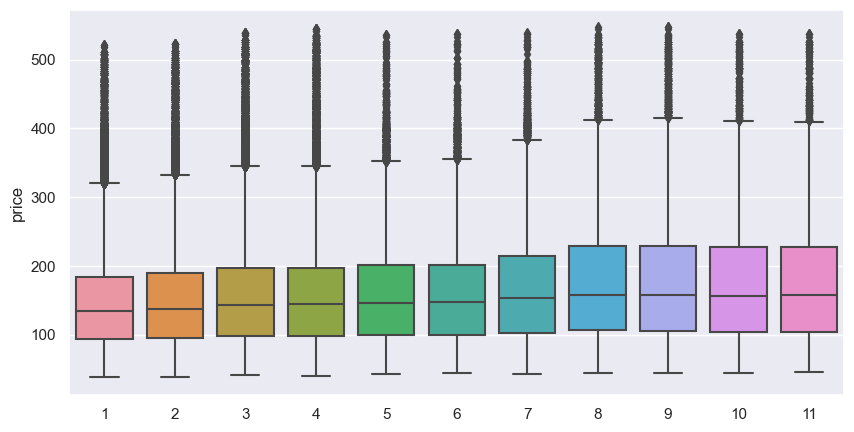

In [121]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data_train["index_request"], y=data_train["price"]).set(xlabel=None)

In [175]:
data_train=data_train.drop(['avatar_id'],axis=1)
data_test=data_test.drop(['avatar_id'],axis=1)

In [176]:
data_train=data_train.drop(['price'],axis=1)

In [177]:
data_test=data_test.drop(['order_requests'],axis=1)

In [178]:
data_train=data_train.drop(['index_request'],axis=1)
data_test=data_test.drop(['index_request'],axis=1)

In [179]:
data_train.head()

,hotel_id,stock,city,date,language,mobile,group,brand,parking,pool,children_policy,log_price
0,639,110,154.264554,35,157.925502,1,154.236450,180.153032,0,1,0,5.003946
1,376,115,154.264554,35,157.925502,1,174.788016,176.594803,0,0,0,5.068904
2,985,70,154.264554,35,157.925502,1,121.370491,109.032349,1,0,0,4.219508
3,377,84,154.264554,35,157.925502,1,146.789097,153.026801,1,0,0,4.844187
4,200,80,154.264554,35,157.925502,1,146.789097,153.026801,0,0,0,4.867534


In [180]:
data_test.head()

,city,date,language,mobile,hotel_id,stock,group,brand,parking,pool,children_policy
0,136.682873,21,156.871815,0,161,46,146.789097,153.026801,1,0,0
1,136.682873,21,156.871815,0,187,32,174.788016,176.594803,1,1,0
2,136.682873,21,156.871815,0,279,12,121.370491,109.032349,1,0,0
3,136.682873,21,156.871815,0,395,10,174.788016,127.821561,0,0,0
4,136.682873,21,156.871815,0,488,42,174.788016,225.626198,1,1,1


In [181]:
data_train=data_train.iloc[train_sorted_bis.index]

In [187]:
# data_test=data_test.drop(['hotel_id'],axis=1)
# data_train=data_train.drop(['hotel_id'],axis=1)

In [183]:
cols=['city','date','language','mobile','hotel_id','stock','group','brand','parking','pool','children_policy','log_price']

In [184]:
data_train=data_train[cols]

In [185]:
logprice=data_train['log_price']
X_train, X_test, Y_train, Y_test = train_test_split(data_train,logprice,test_size=0.25,random_state=11)
X_train=X_train.drop(['log_price'],axis=1)

In [186]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))



Meilleur score = 0.990156, Meilleur paramètre = {'max_features': 9}


In [187]:
Ypred_regrf = regrfOpt.predict(data_test)

In [142]:
# param=[{"bootstrap": [True], "max_depth": [110], "max_features": [9], "min_samples_leaf": [3], "min_samples_split": [8], "n_estimators": [1000]}]
# regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrf= RandomForestRegressor(bootstrap= True, max_depth= 110, max_features = 9, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 1000)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))
print("FINI")
#Ypred_regrf = regrfOpt.predict(data_test)


FINI


In [69]:
import pickle


# If you've fitted the model just type this to save it: Remember to change the file name
with open("regrfOpt_model.pkl", "wb") as f:
    pickle.dump(regrfOpt, f)  
    
with open("regrfOpt_model.pkl", "rb") as f:
    regrfOpt = pickle.load(f)

In [143]:
Ypred_regrf = regrfOpt.predict(data_test)

In [188]:
d_test= pd.read_csv('test_set.csv')
submission=pd.DataFrame()
submission['index']=d_test['index']
submission['price']=np.exp(Ypred_regrf)

In [189]:
submission.head()

,index,price
0,0,109.882676
1,1,138.102976
2,2,56.142459
3,3,58.059021
4,4,202.853692


In [190]:
submission.to_csv('submission.csv', index=False)

## Adversial Validation 

In [31]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import cv
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier as RF
#from sklearn import cross_validation as CV
from sklearn.model_selection import train_test_split
from time import ctime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, PolynomialFeatures
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import accuracy_score as accuracy

In [36]:
data_train=data_train.drop(['log_price'],axis=1)

In [35]:
data_train=data_train.drop(['price'],axis=1)

In [144]:
# select only the numerical features
X_test  = data_test.select_dtypes(include=['number']).copy()
X_train = data_train.select_dtypes(include=['number']).copy()


# add the train/test labels
X_train["TARGET"] = 0
X_test["TARGET"]  = 1

# make one big dataset
all_data = pd.concat([X_train, X_test], axis=0, ignore_index=True)

# shuffle
all_data_shuffled = all_data.sample(frac=1)

# create our DMatrix (the XGBoost data structure)
X = all_data_shuffled.drop(['TARGET'], axis=1)
y = all_data_shuffled['TARGET']
XGBdata = xgb.DMatrix(data=X,label=y)

# our XGBoost parameters
params = {"objective":"binary:logistic",
          "eval_metric":"logloss",
          'learning_rate': 0.05,
          'max_depth': 5, }

# perform cross validation with XGBoost
cross_val_results = cv(dtrain=XGBdata, params=params, 
                       nfold=5, metrics="auc", 
                       num_boost_round=200,early_stopping_rounds=20,
                       as_pandas=True)

# print out the final result
print((cross_val_results["test-auc-mean"]).tail(1))

199    0.974879
Name: test-auc-mean, dtype: float64


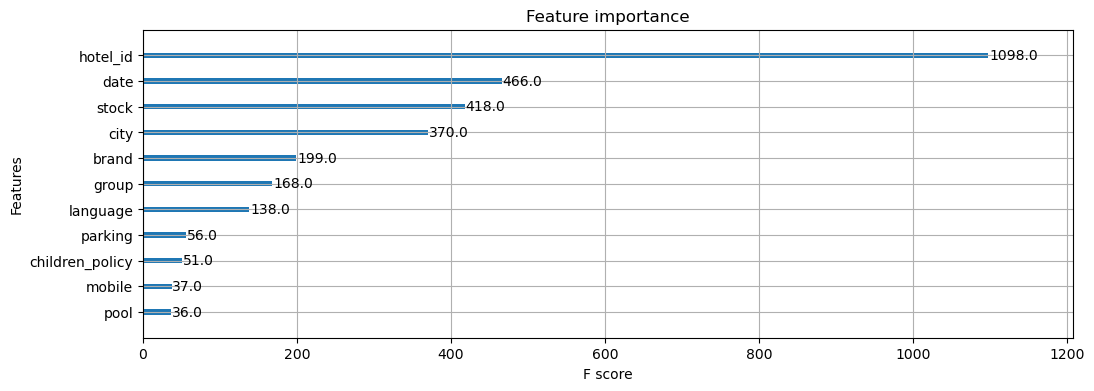

In [146]:

classifier = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
classifier.fit(X, y)
fig, ax = plt.subplots(figsize=(12,4))
plot_importance(classifier, ax=ax)
plt.show()

In [149]:
data_train=data_train.drop(['hotel_id'],axis=1)
data_test=data_test.drop(['hotel_id'],axis=1)

In [150]:


# select only the numerical features
X_test  = data_test.select_dtypes(include=['number']).copy()
X_train = data_train.select_dtypes(include=['number']).copy()


# add the train/test labels
X_train["TARGET"] = 0
X_test["TARGET"]  = 1

# make one big dataset
all_data = pd.concat([X_train, X_test], axis=0, ignore_index=True)

# shuffle
all_data_shuffled = all_data.sample(frac=1)

# create our DMatrix (the XGBoost data structure)
X = all_data_shuffled.drop(['TARGET'], axis=1)
y = all_data_shuffled['TARGET']
XGBdata = xgb.DMatrix(data=X,label=y)

# our XGBoost parameters
params = {"objective":"binary:logistic",
          "eval_metric":"logloss",
          'learning_rate': 0.05,
          'max_depth': 5, }

# perform cross validation with XGBoost
cross_val_results = cv(dtrain=XGBdata, params=params, 
                       nfold=5, metrics="auc", 
                       num_boost_round=200,early_stopping_rounds=20,
                       as_pandas=True)

# print out the final result
print((cross_val_results["test-auc-mean"]).tail(1))

199    0.953972
Name: test-auc-mean, dtype: float64


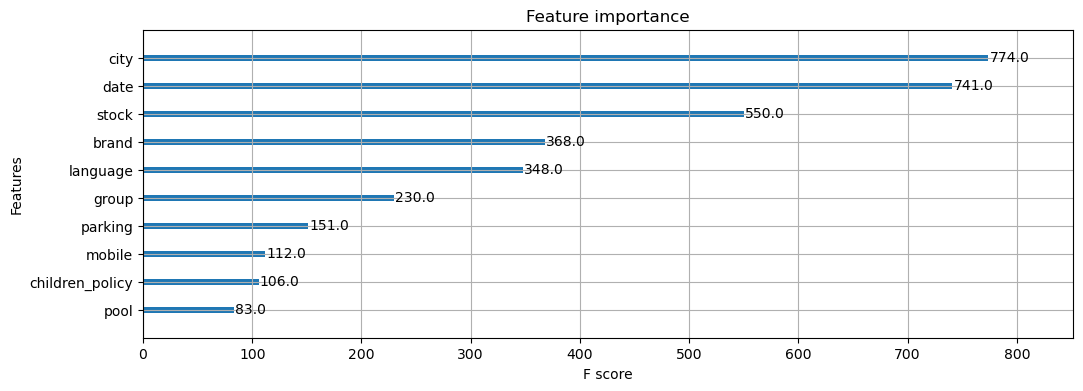

In [151]:
classifier = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
classifier.fit(X, y)
fig, ax = plt.subplots(figsize=(12,4))
plot_importance(classifier, ax=ax)
plt.show()

In [36]:
train = data_train
test = data_test

#test.drop( 't_id', axis = 1, inplace = True )
#test['target'] = 0  # dummy for preserving column order when concatenating

train['is_test'] = 0
test['is_test'] = 1

orig_train = train.copy()
#assert( np.all( orig_train.columns == test.columns ))

train = pd.concat(( orig_train, test ))
train.reset_index( inplace = True, drop = True )

x = train.drop( [ 'is_test' ], axis = 1 )
y = train.is_test


In [37]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5678)
#cv=skf.split(X, y)

# cv = StratifiedKFold( y, n_splits = 5, shuffle = True, random_state = 5678 )

n_estimators = 100
clf = RF( n_estimators = n_estimators, n_jobs = -1 )

predictions = np.zeros( y.shape )



In [38]:
predictions.shape

(358397,)

In [39]:

for f, ( train_i, test_i ) in enumerate( skf.split(x, y) ):

    print("# fold {}, {}".format( f + 1, ctime()))

    x_train = x.iloc[train_i]
    x_test = x.iloc[test_i]
    y_train = y.iloc[train_i]
    y_test = y.iloc[test_i]
    
    clf.fit( x_train, y_train )

    p = clf.predict_proba( x_test )[:,1]
    
    auc = AUC( y_test, p )

    predictions[ test_i ] = p




# fold 1, Thu Jan  5 13:04:52 2023
# fold 2, Thu Jan  5 13:05:06 2023
# fold 3, Thu Jan  5 13:05:20 2023
# fold 4, Thu Jan  5 13:05:34 2023
# fold 5, Thu Jan  5 13:05:49 2023


In [40]:
predictions.shape

(358397,)

In [41]:
train.shape

(358397, 12)

In [43]:
train['p'] = predictions
i = predictions.argsort()
train_sorted = train.iloc[i]


train_sorted = train_sorted.loc[ train_sorted.is_test == 0 ]
assert( train_sorted.is_test.sum() == orig_train.is_test.sum())

In [236]:
# train_sorted.to_csv('./Datatrain/train_sorted.csv')

In [44]:
train_sorted

,city,date,language,mobile,hotel_id,stock,group,brand,parking,pool,children_policy,is_test,p
0,154.264554,35,157.925502,1,639,110,154.236450,180.153032,0,1,0,0,0.00
219936,149.569205,41,154.085495,1,411,46,121.370491,109.032349,0,0,0,0,0.00
219935,149.569205,41,154.085495,1,525,92,146.789097,137.730454,0,0,0,0,0.00
219934,149.569205,41,154.085495,1,500,112,121.370491,109.032349,0,0,0,0,0.00
219933,149.569205,41,154.085495,1,673,159,154.236450,180.153032,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,157.686331,1,157.862373,1,428,0,146.789097,137.730454,1,0,0,0,0.62
36717,163.303989,1,156.021126,0,163,1,154.236450,180.153032,0,1,0,0,0.62
36725,163.303989,1,156.021126,0,441,1,154.236450,180.153032,0,0,0,0,0.63
20764,157.686331,1,161.784635,1,428,0,146.789097,137.730454,1,0,0,0,0.65


In [115]:
train_sorted.drop( 'is_test', axis = 1, inplace = True )

In [148]:
train_sorted[train_sorted.p >= 0.02]

,city,date,language,mobile,hotel_id,stock,group,brand,parking,pool,children_policy,is_test,p
222071,178.845041,37,154.085495,0,910,38,154.236450,122.135084,0,0,0,0,0.02
304547,153.781035,5,162.909176,0,178,8,174.788016,225.626198,0,1,0,0,0.02
268939,157.686331,3,157.478200,1,268,0,146.789097,137.730454,0,0,0,0,0.02
273987,163.303989,7,153.591004,1,918,9,187.146369,216.925345,1,1,0,0,0.02
268864,154.264554,3,157.478200,0,598,0,146.789097,153.026801,1,1,0,0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,157.686331,1,157.862373,1,428,0,146.789097,137.730454,1,0,0,0,0.62
36717,163.303989,1,156.021126,0,163,1,154.236450,180.153032,0,1,0,0,0.62
36725,163.303989,1,156.021126,0,441,1,154.236450,180.153032,0,0,0,0,0.63
20764,157.686331,1,161.784635,1,428,0,146.789097,137.730454,1,0,0,0,0.65


In [150]:
train_sorted_bis=train_sorted[train_sorted.p != 0.02]

In [122]:
train_sorted_bis[train_sorted_bis.index==174066]

,stock,city,date,language,mobile,index_request,group,brand,parking,pool,children_policy,p
174066,226,167.0,40,160.0,1,2,223.0,279.0,1,1,0,0.0


In [123]:
data_train[data_train.index==174066]

,stock,city,date,language,mobile,index_request,group,brand,parking,pool,children_policy,is_test
174066,226,167.0,40,160.0,1,2,223.0,279.0,1,1,0,0


## Submission

In [4]:
data_train1=pd.read_csv('./Datatrain/TRAIN_requete2_features.csv')
data_train1=data_train1.drop(['Unnamed: 0'],axis=1)

In [5]:
data_train2=pd.read_csv('./Datatrain/test_requete_features.csv')
data_train2=data_train2.drop(['Unnamed: 0'],axis=1)

In [6]:
data_train2['index_request']=0

In [7]:
data_train=pd.concat([data_train1,data_train2])

In [8]:
data_train.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0
1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0
2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0
3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0
4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0


In [9]:
list_avatar_train=data_train['avatar_id'].unique()

In [10]:
data_train['index_request']=0

In [12]:
for avatar in list_avatar_train : 
    test1=data_train[data_train['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_train[data_train['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_train[data_train['avatar_id']==avatar]=test1

In [13]:
data_test= pd.read_csv('test_set.csv')

In [14]:
data_test

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42
...,...,...,...,...,...,...,...,...,...
6639,6639,843,rome,5,irish,0,794,987,1
6640,6640,844,vienna,1,irish,1,794,26,1
6641,6641,844,vienna,1,irish,1,794,263,0
6642,6642,844,vienna,1,irish,1,794,456,0


In [15]:
list_avatar_test=data_test['avatar_id'].unique()

In [16]:
data_test['index_request']=0

In [17]:
for avatar in list_avatar_test : 
    test1=data_test[data_test['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_test[data_test['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_test[data_test['avatar_id']==avatar]=test1

In [18]:
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
data_test = data_test.join(hotels, on=['hotel_id', 'city'])
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,1,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,1,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,1,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,1,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,1,Accar Hotels,Safitel,1,1,1


In [19]:
city_encoding = data_train.groupby(['city'])['price'].mean().to_dict()
group_encoding=data_train.groupby(['group'])['price'].mean().to_dict()
brand_encoding=data_train.groupby(['brand'])['price'].mean().to_dict()
language_encoding=data_train.groupby(['language'])['price'].mean().to_dict()

In [20]:
encoder = TargetEncoder()
data_train['city'] = encoder.fit_transform(data_train['city'], data_train['price'])
data_train['language'] = encoder.fit_transform(data_train['language'], data_train['price'])
data_train['group'] = encoder.fit_transform(data_train['group'], data_train['price'])
data_train['brand'] = encoder.fit_transform(data_train['brand'], data_train['price'])

In [21]:
data_test['city'] = data_test['city'].map(city_encoding)
data_test['group'] = data_test['group'].map(group_encoding)
data_test['brand'] = data_test['brand'].map(brand_encoding)
data_test['language'] = data_test['language'].map(language_encoding)

In [22]:
# data_train=pd.get_dummies(data_train, columns=['city', 'language', 'group', 'brand'])

In [23]:
# data_test=pd.get_dummies(data_test, columns=['city', 'language','group', 'brand'])

In [24]:
data_train

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
0,639,149,110,145.327124,35,157.175881,1,155054,1,149.996392,201.830076,0,1,0
1,376,159,115,145.327124,35,157.175881,1,155054,1,189.431162,198.945460,0,0,0
2,985,68,70,145.327124,35,157.175881,1,155054,1,96.759730,96.759730,1,0,0
3,377,127,84,145.327124,35,157.175881,1,155054,1,135.071234,148.814340,1,0,0
4,200,130,80,145.327124,35,157.175881,1,155054,1,135.071234,148.814340,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291402,620,170,12,111.672704,15,165.079698,1,146515,3,219.862026,206.577541,0,1,0
291403,605,182,15,111.672704,15,165.079698,1,146515,3,149.996392,201.830076,1,0,0
291404,516,264,23,111.672704,15,165.079698,1,146515,3,224.502289,286.189968,1,0,2
291405,490,144,13,111.672704,15,165.079698,1,146515,3,149.996392,158.068632,1,0,0


In [25]:
data_test

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,0,1,111.672704,21,155.764517,0,1,161,46,1,135.071234,148.814340,1,0,0
1,1,1,111.672704,21,155.764517,0,1,187,32,1,189.431162,198.945460,1,1,0
2,2,1,111.672704,21,155.764517,0,1,279,12,1,96.759730,96.759730,1,0,0
3,3,1,111.672704,21,155.764517,0,1,395,10,1,189.431162,81.183861,0,0,0
4,4,1,111.672704,21,155.764517,0,1,488,42,1,189.431162,293.348114,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,6639,843,149.668163,5,165.322612,0,794,987,1,3,189.431162,81.183861,1,0,0
6640,6640,844,157.496477,1,165.322612,1,794,26,1,4,189.431162,198.945460,1,0,0
6641,6641,844,157.496477,1,165.322612,1,794,263,0,4,135.071234,122.836223,1,0,0
6642,6642,844,157.496477,1,165.322612,1,794,456,0,4,149.996392,158.068632,1,0,0


In [26]:
data_test_bis=data_test.drop(['index','order_requests'],axis=1)

In [27]:
data_test_bis

,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,111.672704,21,155.764517,0,1,161,46,1,135.071234,148.814340,1,0,0
1,111.672704,21,155.764517,0,1,187,32,1,189.431162,198.945460,1,1,0
2,111.672704,21,155.764517,0,1,279,12,1,96.759730,96.759730,1,0,0
3,111.672704,21,155.764517,0,1,395,10,1,189.431162,81.183861,0,0,0
4,111.672704,21,155.764517,0,1,488,42,1,189.431162,293.348114,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,149.668163,5,165.322612,0,794,987,1,3,189.431162,81.183861,1,0,0
6640,157.496477,1,165.322612,1,794,26,1,4,189.431162,198.945460,1,0,0
6641,157.496477,1,165.322612,1,794,263,0,4,135.071234,122.836223,1,0,0
6642,157.496477,1,165.322612,1,794,456,0,4,149.996392,158.068632,1,0,0


In [148]:
# data_test_bis=data_test_bis.drop(['language_portuguese', 'language_romanian', 'language_slovakian', 'language_slovene', 'language_spanish', 'language_swedish'],axis=1)

In [28]:
data_test_bis=data_test_bis.drop(['avatar_id'],axis=1)

In [29]:
data_train=data_train.drop(['avatar_id'],axis=1)

In [30]:
data_test_bis

,city,date,language,mobile,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,111.672704,21,155.764517,0,161,46,1,135.071234,148.814340,1,0,0
1,111.672704,21,155.764517,0,187,32,1,189.431162,198.945460,1,1,0
2,111.672704,21,155.764517,0,279,12,1,96.759730,96.759730,1,0,0
3,111.672704,21,155.764517,0,395,10,1,189.431162,81.183861,0,0,0
4,111.672704,21,155.764517,0,488,42,1,189.431162,293.348114,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6639,149.668163,5,165.322612,0,987,1,3,189.431162,81.183861,1,0,0
6640,157.496477,1,165.322612,1,26,1,4,189.431162,198.945460,1,0,0
6641,157.496477,1,165.322612,1,263,0,4,135.071234,122.836223,1,0,0
6642,157.496477,1,165.322612,1,456,0,4,149.996392,158.068632,1,0,0


In [31]:
data_test_bis.index=data_test_bis['hotel_id']

In [32]:
data_test_bis=data_test_bis.drop(['hotel_id'],axis=1)

In [33]:
data_train.index=data_train['hotel_id']

In [34]:
data_train=data_train.drop(['hotel_id'],axis=1)

In [37]:
price=data_train['price']
X_train, X_test, Y_train, Y_test = train_test_split(data_train,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'],axis=1)
X_test=X_test.drop(['price'],axis=1)

In [38]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(data_test_bis)



Meilleur score = 0.973750, Meilleur paramètre = {'max_features': 9}


In [ ]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': list(range(1,10)),
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# regrf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# regrfOpt=regrf.fit(X_train, Y_train)
# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

# Ypred_regrf = regrfOpt.predict(data_test_bis)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Meilleur score = 0.959372, Meilleur paramètre = {'bootstrap': True, 'max_depth': 110, 'max_features': 9, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

In [ ]:
# -----------------------------METHODE RANDOM DE RANDOM FOREST--------------------------------------------


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regrfOpt = rf_random.fit(X_train, Y_train)


print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(data_test_bis)




# --------------------------------------------EN PLUS MAIS PAS UTILE POUR LE MOMENT------------------------------------------------------



# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(train_features, train_labels)
# base_accuracy = evaluate(base_model, test_features, test_labels)

# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, test_features, test_labels)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


In [ ]:
# param=[{"max_depth":[20], "learning_rate":[1.0]}]
# reggradboost = GridSearchCV(GradientBoostingRegressor(n_estimators=100), param, cv=10,n_jobs=-1)

# reggradboost_Opt=reggradboost.fit(X_train, Y_train)

# print("Meilleur score = %f, Meilleur paramètre = %s" % (reggradboost_Opt.best_score_,reggradboost_Opt.best_params_))

# Ypred_gbreg = reggradboost_Opt.predict(data_test_bis)

In [39]:
submission=pd.DataFrame()
submission['index']=data_test['index']
submission['price']=Ypred_regrf

In [40]:
submission

,index,price
0,0,79.362000
1,1,101.640000
2,2,44.411833
3,3,42.951667
4,4,137.850000
...,...,...
6639,6639,42.680000
6640,6640,95.200000
6641,6641,60.070000
6642,6642,84.400000


In [41]:
submission.to_csv('submission.csv', index=False)